In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pyaudio
import wave
from pydub import AudioSegment
import scipy
from scipy.io import wavfile #audio i/o
from IPython.display import Audio #listening to audio
import thinkdsp
import thinkstats2
%matplotlib inline

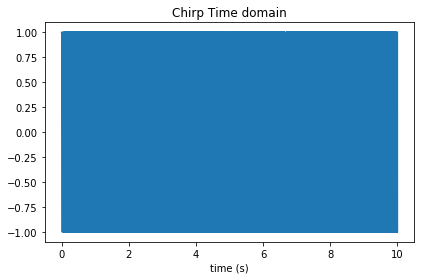

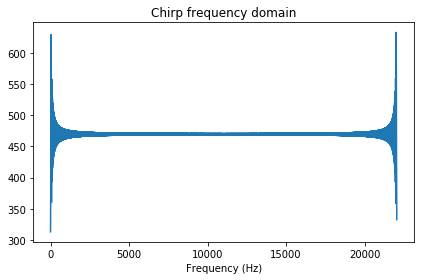

In [91]:
signal = thinkdsp.Chirp(start = 1, end = 22050, amp = 1.0)
wave = signal.make_wave(duration = 10, framerate = 44100)
wave.plot()
thinkdsp.decorate(xlabel = 'time (s)', title = 'Chirp Time domain')
spectrum = wave.make_spectrum()
plt.figure()
spectrum.plot()
thinkdsp.decorate(xlabel = 'Frequency (Hz)', title = 'Chirp frequency domain')
wave.make_audio()

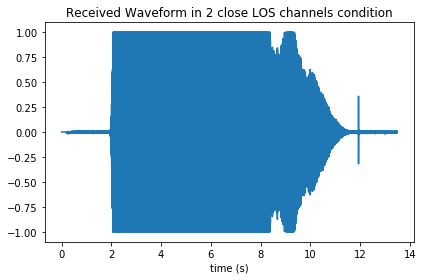

In [102]:
los2= thinkdsp.read_wave('Multi-speaker_Chirp_2los.wav')
los2.plot()
thinkdsp.decorate(xlabel = 'time (s)', title = 'Received Waveform in 2 close LOS channels condition')

In [103]:
corr_los2 = np.correlate(los2.ys, wave.ys, 'valid')
start_los2 = np.argmax(corr_los2)
start_los2

85557

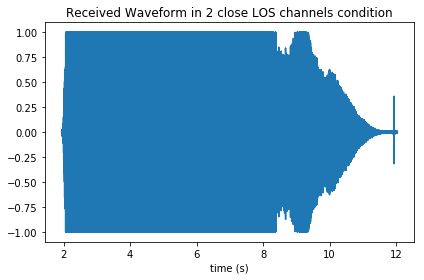

In [104]:
start_los2 = 85557
los2_seg = los2.segment(start = (start_los2-50)/44100, duration = 10.1)
los2_seg.plot()
thinkdsp.decorate(xlabel = 'time (s)', title = 'Received Waveform in 2 close LOS channels condition')

Text(0,0.5,'Amplitude')

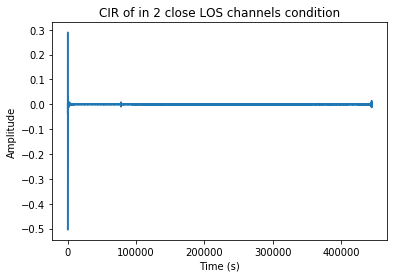

In [105]:
H_los2 = np.fft.fft(los2_seg.ys)/np.fft.fft(wave.ys, len(los2_seg.ys))
cir_los2 = np.fft.ifft(H_los2)
plt.plot(cir_los2)
plt.title('CIR of in 2 close LOS channels condition')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0,0.5,'Amplitude')

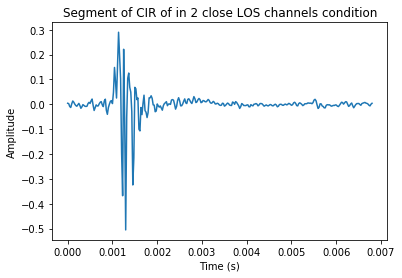

In [106]:
n_samples = 300
t = np.linspace(0, n_samples/los2.framerate, n_samples)
plt.plot(t, cir_los2[:300])
plt.title('Segment of CIR of in 2 close LOS channels condition')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

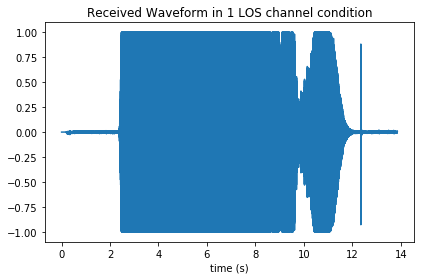

In [96]:
los1 = thinkdsp.read_wave('Multi-speaker_Chirp_1los.wav')
los1.plot()
thinkdsp.decorate(xlabel = 'time (s)', title = 'Received Waveform in 1 LOS channel condition')

In [9]:
corr_los1 = np.correlate(los1.ys, wave.ys, 'valid')
los1_start = np.argmax(corr_los1)
los1_start

103811

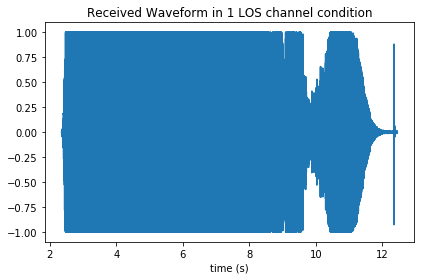

In [98]:
los1_start = 103811
los1_seg = los1.segment(start = (los1_start-50)/44100, duration = 10.1)
los1_seg.plot()
thinkdsp.decorate(xlabel = 'time (s)', title = 'Received Waveform in 1 LOS channel condition')

Text(0,0.5,'Amplitude')

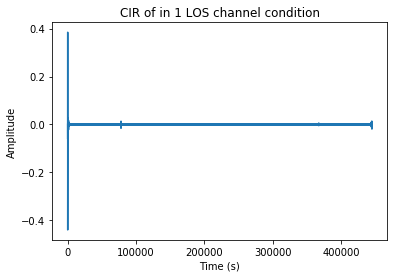

In [99]:
H_los1 = np.fft.fft(los1_seg.ys)/np.fft.fft(wave.ys, len(los1_seg.ys))
cir_los1 = np.fft.ifft(H_los1)
plt.plot(cir_los1)
plt.title('CIR of in 1 LOS channel condition')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0,0.5,'Amplitude')

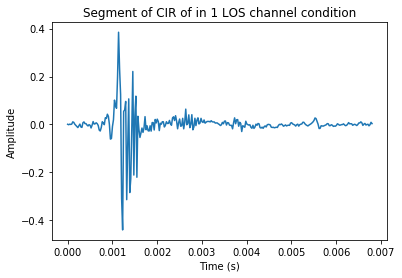

In [100]:
n_samples = 300
t = np.linspace(0, n_samples/los1.framerate, n_samples)
plt.plot(t, cir_los1[:n_samples])
plt.title('Segment of CIR of in 1 LOS channel condition')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

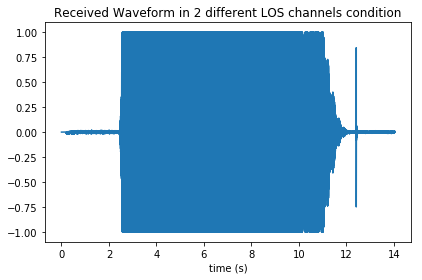

In [107]:
los2_diff = thinkdsp.read_wave('Multi-speaker_Chirp_2diffdist.wav')
los2_diff.plot()
thinkdsp.decorate(xlabel = 'time (s)', title = 'Received Waveform in 2 different LOS channels condition')

In [29]:
corr_los2_diff = np.correlate(los2_diff.ys, wave.ys, 'valid')
los2_diff_start = np.argmax(corr_los2_diff)
los2_diff_start

106812

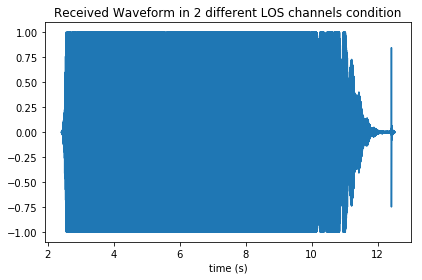

In [108]:
los2_diff_start = 106812
los2_diff_seg = los2_diff.segment(start = (los2_diff_start-100)/44100, duration = 10.1)
los2_diff_seg.plot()
thinkdsp.decorate(xlabel = 'time (s)', title = 'Received Waveform in 2 different LOS channels condition')

Text(0,0.5,'Amplitude')

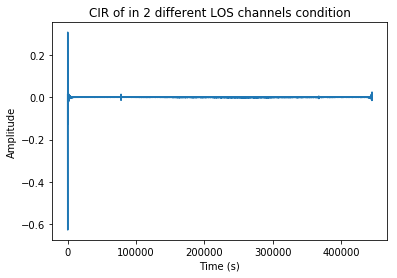

In [109]:
H_los2_diff = np.fft.fft(los2_diff_seg.ys)/np.fft.fft(wave.ys, len(los2_diff_seg.ys))
cir_los2_diff = np.fft.ifft(H_los2_diff)
plt.plot(cir_los2_diff)
plt.title('CIR of in 2 different LOS channels condition')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0,0.5,'Amplitude')

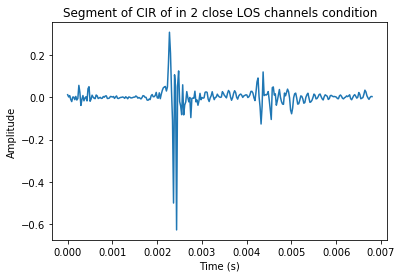

In [110]:
n_samples = 300
t = np.linspace(0, n_samples/los1.framerate, n_samples)
plt.plot(t, cir_los2_diff[:n_samples])
plt.title('Segment of CIR of in 2 close LOS channels condition')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

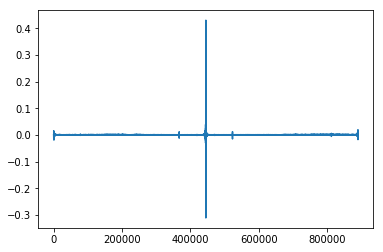

In [62]:
corr2 = np.correlate(cir_los1, cir_los2, 'full')
plt.plot(corr2)

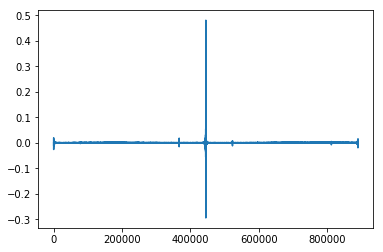

In [63]:
corr3 = np.correlate(cir_los1, cir_los2_diff, 'full')
plt.plot(corr3)

In [19]:
bias = len(cir_los1)-np.argmax(corr2)-1
bias

-1

In [64]:
bias = len(cir_los1)-np.argmax(corr3)-1
bias

49

In [114]:
from ipywidgets import interact
def plotLOS(n_samples, los1 = True, los2 = True, los2_diff = True):
    t = np.linspace(0, n_samples/44100, n_samples)
    plt.figure(figsize = (20,10))
    if los1 == True:
        plt.plot(t, cir_los1[1:n_samples+1], label = 'One speaker with LOS channel')
    if los2 == True:
        plt.plot(t, cir_los2[:n_samples], label = 'Two speakers with LOS channel')
    if los2_diff == True:
        plt.plot(t, cir_los2_diff[49:n_samples+49], label = 'Two speakers with large distance difference all LOS channel')
    plt.title('Comparison of LOS condition')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    print(np.abs(np.correlate(cir_los1[1:n_samples+1], cir_los2[:n_samples])))
interact(plotLOS, n_samples = (0, len(cir_los1), 100), los1 = True, los2 = True, los2_diff = True)

interactive(children=(IntSlider(value=222700, description='n_samples', max=445410, step=100), Checkbox(value=T…

<function __main__.plotLOS(n_samples, los1=True, los2=True, los2_diff=True)>

In [116]:
def plotLOSSeparate(n_samples):
    plt.figure(figsize = (20,6))
    t = np.linspace(0, n_samples/44100, n_samples)
    plt.subplot(131)
    plt.plot(t, cir_los1[1:n_samples+1])
    plt.title('One speaker with LOS channel')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.subplot(132)
    plt.plot(t, cir_los2[:n_samples])
    plt.title('Two speakers with LOS channel')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.subplot(133)
    plt.plot(t, cir_los2_diff[49:n_samples+49])
    plt.title( 'Two speakers with large distance difference all LOS channel')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    
interact(plotLOSSeparate, n_samples = (0, len(cir_los1), 100))

interactive(children=(IntSlider(value=222700, description='n_samples', max=445410, step=100), Output()), _dom_…

<function __main__.plotLOSSeparate(n_samples)>

Study the NLOS case

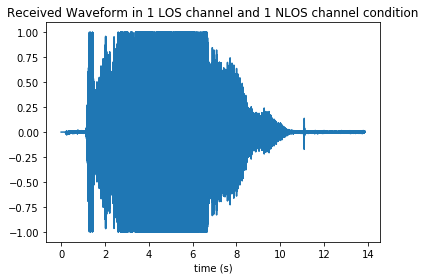

In [117]:
nlos1 = thinkdsp.read_wave('Multi-speaker_Chirp_1nlos.wav')
nlos1.plot()
thinkdsp.decorate(xlabel = 'time (s)', title = 'Received Waveform in 1 LOS channel and 1 NLOS channel condition')

In [69]:
corr_nlos1 = np.correlate(nlos1.ys, wave.ys, 'valid')
nlos1_start = np.argmax(corr_nlos1)
nlos1_start

48624

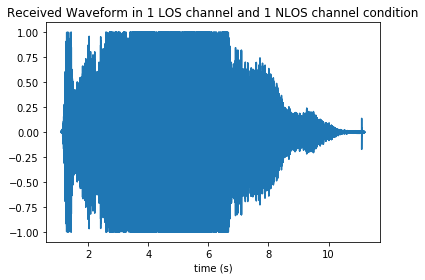

In [118]:
nlos1_start = 48624
nlos1_seg = nlos1.segment(start = (nlos1_start-100)/44100, duration = 10.1)
nlos1_seg.plot()
thinkdsp.decorate(xlabel = 'time (s)', title = 'Received Waveform in 1 LOS channel and 1 NLOS channel condition')

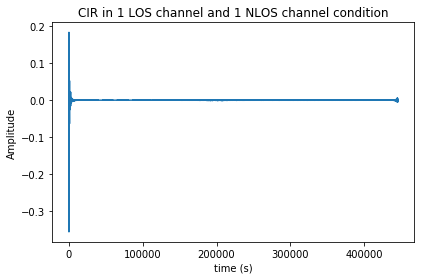

In [120]:
H_nlos1 = np.fft.fft(nlos1_seg.ys)/np.fft.fft(wave.ys, len(nlos1_seg.ys))
cir_nlos1 = np.fft.ifft(H_nlos1)
plt.plot(cir_nlos1)
thinkdsp.decorate(xlabel = 'time (s)', ylabel = 'Amplitude', title = 'CIR in 1 LOS channel and 1 NLOS channel condition')

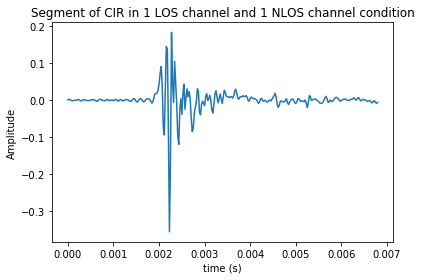

In [123]:
n_samples = 300
t = np.linspace(0, n_samples/nlos1.framerate, n_samples)
plt.plot(t, cir_nlos1[:n_samples])
thinkdsp.decorate(xlabel = 'time (s)', ylabel = 'Amplitude', 
                  title = 'Segment of CIR in 1 LOS channel and 1 NLOS channel condition')

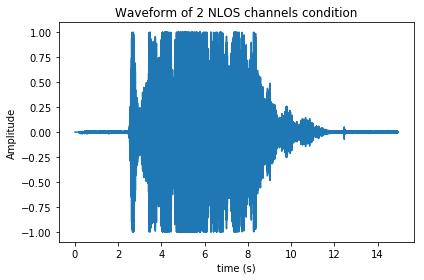

In [124]:
nlos2 = thinkdsp.read_wave('Multi-speaker_Chirp_2nlos.wav')
nlos2.plot()
thinkdsp.decorate(xlabel = 'time (s)', ylabel = 'Amplitude', 
                  title = 'Waveform of 2 NLOS channels condition')

In [79]:
corr_nlos2 = np.correlate(nlos2.ys, wave.ys, 'valid')
nlos2_start = np.argmax(corr_nlos2)
nlos2_start

108339

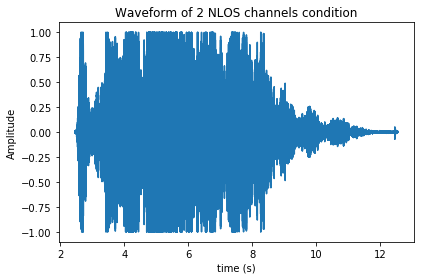

In [126]:
nlos2_start = 108339
nlos2_seg = nlos2.segment(start = (nlos2_start-100)/44100, duration = 10.1)
nlos2_seg.plot()
thinkdsp.decorate(xlabel = 'time (s)', ylabel = 'Amplitude', 
                  title = 'Waveform of 2 NLOS channels condition')

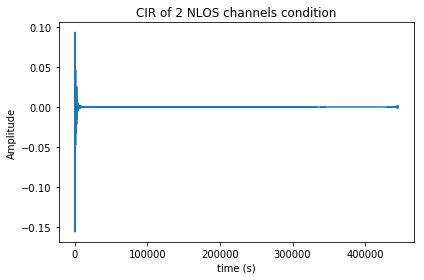

In [127]:
H_nlos2 = np.fft.fft(nlos2_seg.ys)/np.fft.fft(wave.ys, len(nlos2_seg.ys))
cir_nlos2 = np.fft.ifft(H_nlos2)
plt.plot(cir_nlos2)
thinkdsp.decorate(xlabel = 'time (s)', ylabel = 'Amplitude', 
                  title = 'CIR of 2 NLOS channels condition')

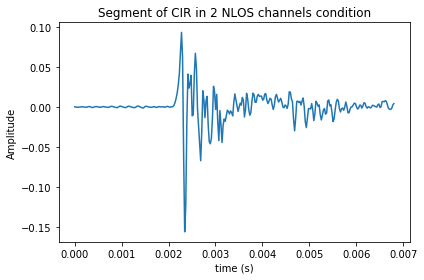

In [128]:
n_samples = 300
t = np.linspace(0, n_samples/nlos2.framerate, n_samples)
plt.plot(t, cir_nlos2[:n_samples])
thinkdsp.decorate(xlabel = 'time (s)', ylabel = 'Amplitude', 
                  title = 'Segment of CIR in 2 NLOS channels condition')

In [129]:
n_samples = 200

def plotNLOS(n_samples):
    t = np.linspace(0, n_samples/nlos1.framerate, n_samples)
    plt.figure(figsize = (20,6))
    plt.subplot(131)
    plt.plot(t, cir_los2[:n_samples])
    plt.title('2 LOS channels')
    plt.subplot(132)
    plt.plot(t, cir_nlos1[:n_samples])
    plt.title('1 NLOS channel')
    plt.subplot(133)
    plt.plot(t, cir_nlos2[:n_samples])
    plt.title('2 NLOS channels')

interact(plotNLOS, n_samples = (0, len(cir_nlos1), 100))

interactive(children=(IntSlider(value=222700, description='n_samples', max=445410, step=100), Output()), _dom_…

<function __main__.plotNLOS(n_samples)>